Lernportfolio 8 - Massenbewegung

Monte Carlo Simulation für BW, ZS, BO

In [8]:
# Packages importieren

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

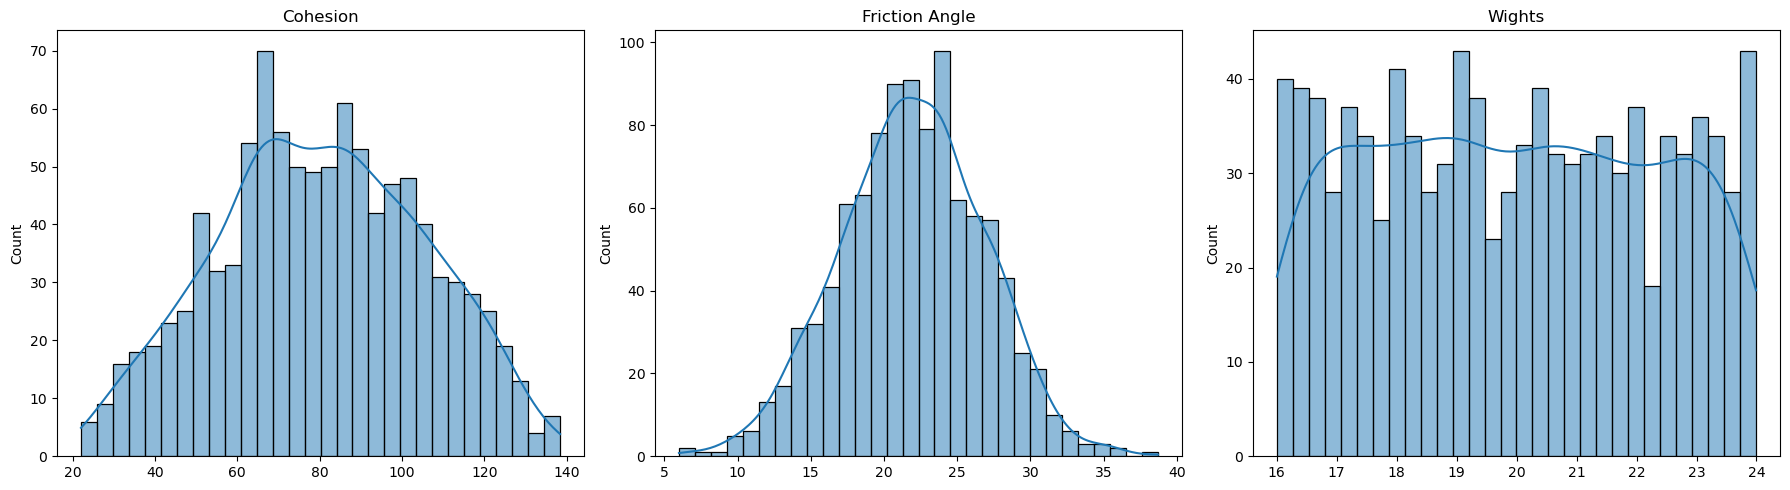

[2.71012022 1.06648315 1.69200306 2.51460978 4.65186568 3.38490922
 2.26687534 2.79330811 4.36121068 5.12840992 3.60267127 2.29589627
 4.7241731  3.16401131 4.65573306 2.48575771 2.10490382 1.83395131
 2.30980515 1.53503161 3.24370699 3.49400048 3.99797017 4.28084944
 4.68716807 2.97021756 4.04013958 2.57932458 3.45624756 4.55283718
 3.31333736 2.1311962  3.24481973 1.99227561 3.12259995 3.5931641
 4.38225801 2.73765599 4.65259437 3.13625487 1.77070102 1.06330149
 3.75473937 3.84711669 5.5825622  5.26900817 3.58396608 2.30038982
 1.53418676 2.93594848 4.25595428 2.6086675  3.72276269 3.67551574
 3.02495627 2.48857274 5.19358277 1.81123692 5.01280841 2.62722368
 1.33021789 3.4594552  2.75439551 4.45725356 3.89525695 2.99822669
 5.04832539 3.42007366 4.2891966  1.73688417 3.08142198 3.94113275
 3.54198381 4.2756806  4.91783936 2.13579859 4.48789042 3.7003274
 3.21705195 2.88665367 4.28202649 2.7361549  1.23609701 3.45088264
 2.15690725 3.00494769 1.84450061 3.05849544 3.54818004 3.113862

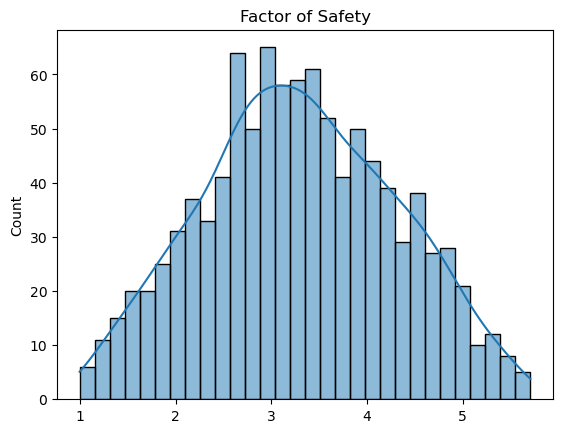

In [9]:
# Eingabeparameter
runs = 1000

H=10
b=8.5
d=2
psi_p=40
psi_p_rad = math.radians(psi_p)
psi_f=70
psi_f_rad = math.radians(psi_f)
wichte_w=9.81
gw=4.5


 # Definieren der Zufallsvariablen für die MC-Simulation
cohesion = np.random.triangular(20, 80, 140, runs) #cohesion
friction_angle = np.random.normal(22, 5, runs) #Reibungswinkel
wights = np.random.uniform(16, 24, runs) # Wichte
# slope =np.random.normal(np.radians(13), np.radians(27), runs)


# Definitionen
c=cohesion              
wichte=wights             
phi=friction_angle           
phi_rad=np.radians(phi)   

# Berechnungen aus den Eingabeparametern
A=15.56
Vol=42.50
A1=8.49
A2=7.07
U=343.39
W = wichte_w * ((1 - np.tan(phi_rad) / np.tan(psi_f_rad)) * (b * H + 0.5 * H**2 / np.tan(psi_f_rad)) + 0.5 * b**2 * (np.tan(np.radians(0)) - np.tan(psi_p_rad)))






  



fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(cohesion, bins=30, kde=True, ax=axes[0])
axes[0].set_title('Cohesion')

sns.histplot(friction_angle, bins=30, kde=True, ax=axes[1])
axes[1].set_title('Friction Angle')

sns.histplot(wights, bins=30, kde=True, ax=axes[2])
axes[2].set_title('Wights')

plt.tight_layout()
plt.show()

df = pd.DataFrame({'cohesion': cohesion, 'friction_angle': friction_angle, 'wights': wights})
df.describe()

Fs = c*A+(W*np.cos(psi_p_rad)-U-Vol*np.sin(psi_p_rad))*np.tan(psi_p_rad)
Fd = W*np.sin(psi_p_rad)+Vol*np.cos(psi_p_rad)

FS_slide = Fs / Fd

print(FS_slide)

sns.histplot(FS_slide, bins=30, kde=True)
plt.title('Factor of Safety')
plt.show()


[2.71012022 1.06648315 1.69200306 2.51460978 4.65186568 3.38490922
 2.26687534 2.79330811 4.36121068 5.12840992 3.60267127 2.29589627
 4.7241731  3.16401131 4.65573306 2.48575771 2.10490382 1.83395131
 2.30980515 1.53503161 3.24370699 3.49400048 3.99797017 4.28084944
 4.68716807 2.97021756 4.04013958 2.57932458 3.45624756 4.55283718
 3.31333736 2.1311962  3.24481973 1.99227561 3.12259995 3.5931641
 4.38225801 2.73765599 4.65259437 3.13625487 1.77070102 1.06330149
 3.75473937 3.84711669 5.5825622  5.26900817 3.58396608 2.30038982
 1.53418676 2.93594848 4.25595428 2.6086675  3.72276269 3.67551574
 3.02495627 2.48857274 5.19358277 1.81123692 5.01280841 2.62722368
 1.33021789 3.4594552  2.75439551 4.45725356 3.89525695 2.99822669
 5.04832539 3.42007366 4.2891966  1.73688417 3.08142198 3.94113275
 3.54198381 4.2756806  4.91783936 2.13579859 4.48789042 3.7003274
 3.21705195 2.88665367 4.28202649 2.7361549  1.23609701 3.45088264
 2.15690725 3.00494769 1.84450061 3.05849544 3.54818004 3.113862

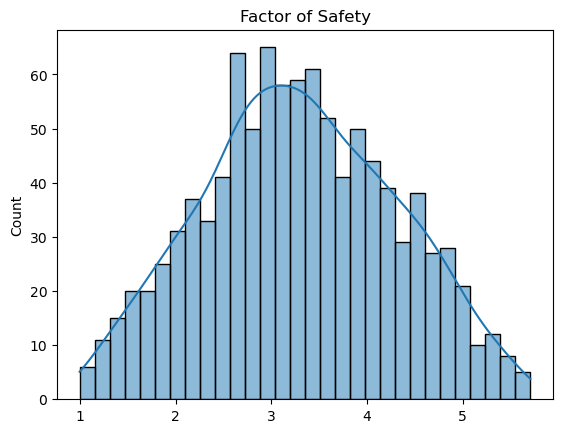

In [10]:
H=10
b=8.5
d=2
psi_p=40
psi_p_rad = math.radians(psi_p)
psi_f=70
psi_f_rad = math.radians(psi_f)
wichte_w=9.81
gw=4.5

c=cohesion              #cohesion
wichte=wights             #wights
phi=friction_angle            #friction_angle
phi_rad=np.radians(phi)      


A=15.56
Vol=42.50
A1=8.49
A2=7.07
U=343.39
W = wichte_w * ((1 - np.tan(phi_rad) / np.tan(psi_f_rad)) * (b * H + 0.5 * H**2 / np.tan(psi_f_rad)) + 0.5 * b**2 * (np.tan(np.radians(0)) - np.tan(psi_p_rad)))


Fs = c*A+(W*np.cos(psi_p_rad)-U-Vol*np.sin(psi_p_rad))*np.tan(psi_p_rad)
Fd = W*np.sin(psi_p_rad)+Vol*np.cos(psi_p_rad)

FS_slide = Fs / Fd

print(FS_slide)

sns.histplot(FS_slide, bins=30, kde=True)
plt.title('Factor of Safety')
plt.show()